In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("./log_20_1_.out", delimiter=" ", )
data2 = pd.read_csv("./log_20_16_.out", delimiter=" ", )
data3 = pd.read_csv("./log_20_32_.out", delimiter=" ", )
data4 = pd.read_csv("./log_36_1_.out", delimiter=" ", )
data5 = pd.read_csv("./log_36_16_.out", delimiter=" ", )
data6 = pd.read_csv("./log_36_32_.out", delimiter=" ", )
data7 = pd.read_csv("./log_1_16_.out", delimiter=" ", )
data8 = pd.read_csv("./log_1_32_.out", delimiter=" ", )

In [3]:
config_list = ["20x1", "20x16", "20x32", "36x1", "36x16", "36x32", "1x16", "1x32"]

config = []
for i in range(len(data1)):
    config.append(config_list[0])
data1["config"] = config

config = []
for i in range(len(data2)):
    config.append(config_list[1])
data2["config"] = config

config = []
for i in range(len(data3)):
    config.append(config_list[2])
data3["config"] = config

config = []
for i in range(len(data4)):
    config.append(config_list[3])
data4["config"] = config

config = []
for i in range(len(data5)):
    config.append(config_list[4])
data5["config"] = config

config = []
for i in range(len(data6)):
    config.append(config_list[5])
data6["config"] = config

config = []
for i in range(len(data7)):
    config.append(config_list[6])
data7["config"] = config

config = []
for i in range(len(data8)):
    config.append(config_list[7])
data8["config"] = config

In [4]:
data_all = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8], axis=0)

In [5]:
data3 = data_all[data_all["ver"].isin(['3'])] 
dataR = data_all[data_all["ver"].isin(['r'])] 


In [6]:
from matplotlib import cycler
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
plt.rc('axes', prop_cycle=(cycler(color=colors)))

def plot_custom_vs_ref(custom_data, reference_data, title):

    plot_data_custom = custom_data.groupby(['config','count']).apply(lambda x: x.loc[x['med'] == x['med'].min()])
    plot_data_referece = reference_data.groupby(['config','count']).apply(lambda x: x.loc[x['med'] == x['med'].min()])

    plot_data_custom = plot_data_custom.reset_index(level=0, drop=True, col_level=0, col_fill='count_')
    plot_data_referece = plot_data_referece.reset_index(level=0, drop=True, col_level=0, col_fill='count_')

    configs_custom = plot_data_custom.groupby('config')
    configs_reference = plot_data_referece.groupby('config')

    plt.figure(dpi=200)

    for config, group in configs_custom:
        plt.loglog(group['count'], group['med'], lw=0.7, label=config)
    for config, group in configs_reference:
        plt.loglog(group['count'], group['med'], ls='dotted', label=config)

    plt.title(title)
    plt.xlabel("problem size [count of elements]")
    plt.ylabel(r"execution time $[\mu s]$")

    plt.legend(loc=2, prop={'size': 7})
    plt.grid()
    plt.savefig("ex3")

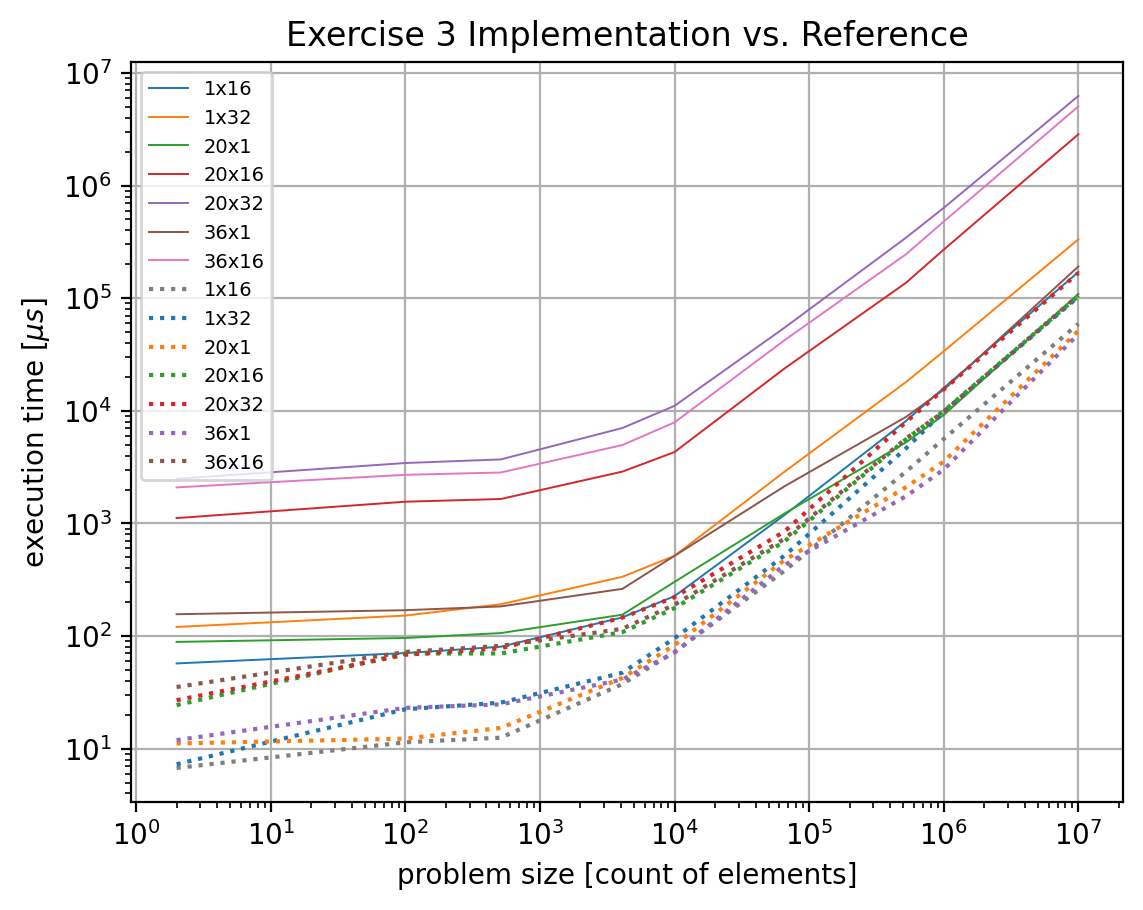

In [7]:
plot_custom_vs_ref(data3, dataR, "Exercise 3 Implementation vs. Reference")